Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import json
%matplotlib inline

**Part1**

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df1 = pd.read_json('logins.json')
pd.set_option('display.max_rows', None)

In [3]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df1.shape

(93142, 1)

In [5]:
# make sure no missing data
df1.isnull().sum()

login_time    0
dtype: int64

In [6]:
#check datat types
df1.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
#df1.login_time = pd.to_datetime(df1.login_time)

In [8]:
pd.Index(df1.login_time).is_monotonic_increasing

False

Issue1: login_time Year starts from 1970 in original data

Issue2: login_time is not sorted in ascending order in original data

In [9]:
df1 = df1.sort_values('login_time', ascending=True)

In [10]:
df1.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [11]:
# make sure date is all sorted in ascending order
pd.Index(df1.login_time).is_monotonic_increasing

True

In [12]:
# create a new column 'count' in df1 and assing value 1 to it
df1['count']=1

In [13]:
df1.head(20)

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1
4,1970-01-01 20:26:21,1
11,1970-01-01 20:31:03,1
12,1970-01-01 20:34:46,1


In [14]:
df1= df1.set_index('login_time')

In [15]:
df1_15t = pd.DataFrame(df1.resample('15T')['count'].sum())

In [16]:
df1_15t.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


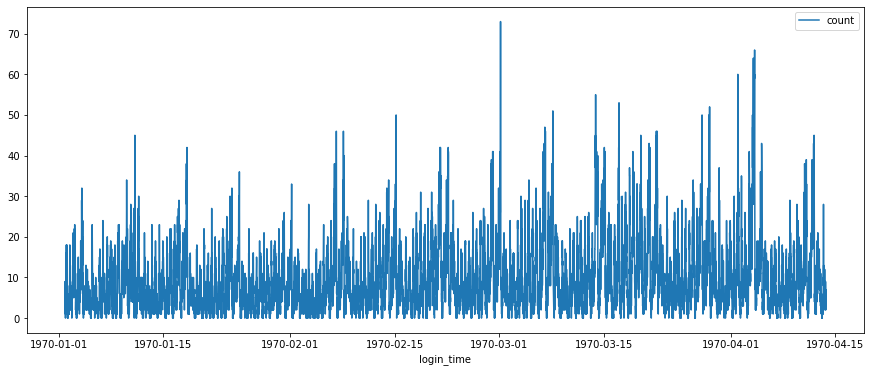

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_15t)
plt.show()

In [18]:
# check if df1_15t is stationary 

from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_15t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.337954
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


As the statistic value -10.34 is less than all the critical values, meaning we can reject the null hypothesis and in turn that the time series is stationary

**Check hourly trend for login count**

In [19]:
df1_h = pd.DataFrame(df1.resample('H')['count'].sum())

In [20]:
df1_h['hourOfday'] = df1_h.index.hour

In [21]:
df1_h.head(5)

,count,hourOfday
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0


data starts from 1/1 20:00

In [22]:
df1_h.tail()

,count,hourOfday
login_time,,
1970-04-13 14:00:00,32,14
1970-04-13 15:00:00,19,15
1970-04-13 16:00:00,22,16
1970-04-13 17:00:00,22,17
1970-04-13 18:00:00,20,18


In [23]:
df1_h.groupby('hourOfday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
hourOfday,,,,,,,,
0,102.0,58.754902,26.689426,14.0,41.00,55.0,72.00,173.0
1,102.0,61.931373,36.550050,16.0,35.00,52.5,80.75,237.0
2,102.0,56.862745,39.672930,10.0,27.00,44.0,88.00,157.0
3,102.0,47.362745,43.286243,4.0,16.25,28.0,70.00,153.0
4,102.0,49.352941,54.485469,4.0,13.00,20.5,77.50,205.0
5,102.0,28.872549,34.566816,2.0,7.00,12.5,47.50,226.0
6,102.0,11.156863,12.741718,1.0,4.00,6.0,16.75,91.0
7,102.0,7.990196,5.096097,2.0,5.00,7.0,10.00,38.0
8,102.0,8.019608,4.209796,0.0,5.00,7.0,10.00,27.0


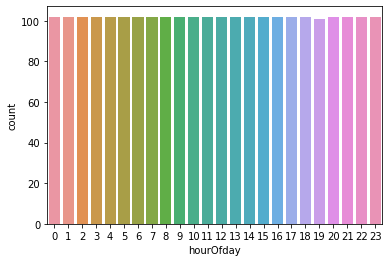

In [24]:
sns.countplot(df1_h['hourOfday'])
plt.show()

As data starts from 1/1 20:00 and ends at 4/13 18:00 therefore 19:00 has 1 hour less than other hours in terms of total count

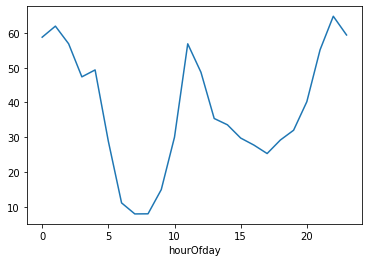

In [25]:
df1_h.groupby('hourOfday')['count'].mean().plot()
#plt.xticks(np.arange(0,24,1))
plt.show()

we can see the hourly login drops after 1am, reaches a minimum around 6am, start increasing from 7am~ 11am, drop again during 11am ~ 5pm. increase again from 6pm and hit maximum around 10pm. A cyclic behavior with a period of about 8 hours.

**Check DayofWeek trend for login count**

In [26]:
df1_D = pd.DataFrame(df1.resample('D')['count'].sum())

In [27]:
df1_D['dayOfweek']= df1_D.index.weekday+1

In [28]:
df1_D.head()

,count,dayOfweek
login_time,,
1970-01-01,112,4
1970-01-02,681,5
1970-01-03,793,6
1970-01-04,788,7
1970-01-05,459,1


Data starts from Thursday

In [29]:
df1_D.tail()

,count,dayOfweek
login_time,,
1970-04-09,818,4
1970-04-10,1009,5
1970-04-11,1352,6
1970-04-12,1409,7
1970-04-13,395,1


Ends on Monday

In [30]:
df1_D.groupby('dayOfweek').describe()

count                                                           \
          count         mean         std    min      25%     50%     75%   
dayOfweek                                                                  
1          15.0   588.200000  118.806686  395.0   491.50   599.0   645.0   
2          14.0   662.000000  203.606332  464.0   543.25   616.0   708.0   
3          14.0   738.500000  189.248615  467.0   650.25   720.5   777.0   
4          15.0   797.333333  288.727174  112.0   649.50   827.0   893.5   
5          15.0  1013.866667  218.635661  681.0   863.00  1009.0  1141.0   
6          15.0  1291.800000  335.041405  793.0  1059.00  1352.0  1486.5   
7          15.0  1211.133333  262.104359  788.0   992.50  1262.0  1432.0   

                   
              max  
dayOfweek          
1           837.0  
2          1290.0  
3          1212.0  
4          1444.0  
5          1504.0  
6          1889.0  
7          1565.0

As data starts from Thursday and ends on Monday so Tuesday and Wednesday are one day less than the other days in terms of the total count

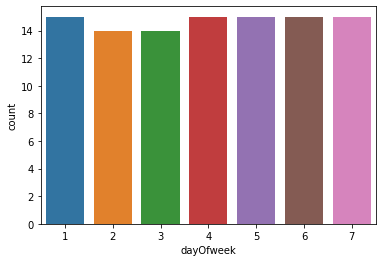

In [31]:
sns.countplot(df1_D['dayOfweek'])
plt.show()

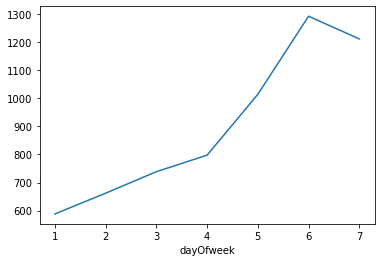

In [32]:
df1_D.groupby('dayOfweek')['count'].mean().plot()
plt.show()

We can see login increase from Thursday of the week and hits maximum on Saturday

**Check daily trend**

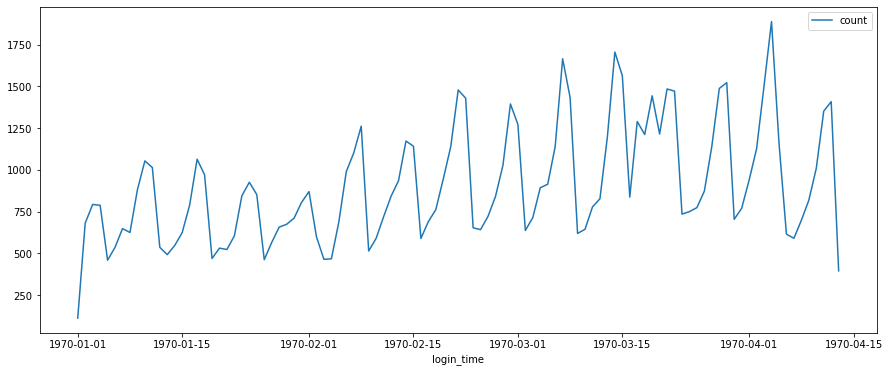

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_D.drop('dayOfweek', axis=1))
plt.show()

When look at daily trend, the plot suggests some cyclic behavior with an interval of about 6~7 days: Demands hit peak around weekend and decline during weekdays.

In [34]:
# check if daily data is stationary

result = adfuller(df1_D['count'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.403316
p-value: 0.580685
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


As the statistic value -1.40 is bigger than all the critical values, meaning we fail to reject the null hypothesis and in turn that the time series is non-stationary

**Check weekly trend for login count**

In [35]:
df1_W = pd.DataFrame(df1.resample('W')['count'].sum())

In [36]:
print('number of weeks:', len(df1_W))
df1_W

number of weeks: 16


,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554


for week 4/19 we only have one day data of 4/13 from 0:00 to 18:00

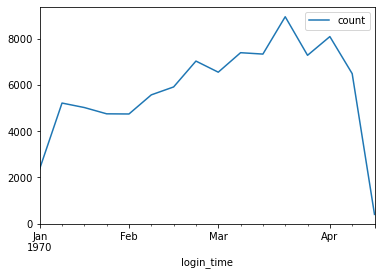

In [37]:
df1_W.plot()
plt.show()

we can see an upward trend in login from January towards the first week of April, hit a maximum around the 4th week in March

**check login count by weekday_hour**

In [38]:
df1_h_w = df1_h.assign(weekOfday=df1_h.index.weekday+1)

In [39]:
df1_h_w = df1_h_w.groupby(['weekOfday', 'hourOfday'])['count'].sum().reset_index()

In [40]:
df1_h_w.nlargest(10, 'count')

,weekOfday,hourOfday,count
148,7,4,2107
124,6,4,1719
147,7,3,1647
122,6,2,1608
146,7,2,1608
123,6,3,1574
121,6,1,1562
118,5,22,1519
145,7,1,1355
119,5,23,1298


if we check the login break down by weekday and hour, we can see weekends around 3 ~ 4 am is the peak of demand.
This trend is different from the hourly break down we checked previously. Suggesting weekday and weekend may have different peak time.
Therefore we checked the weekday_hour trend as below:

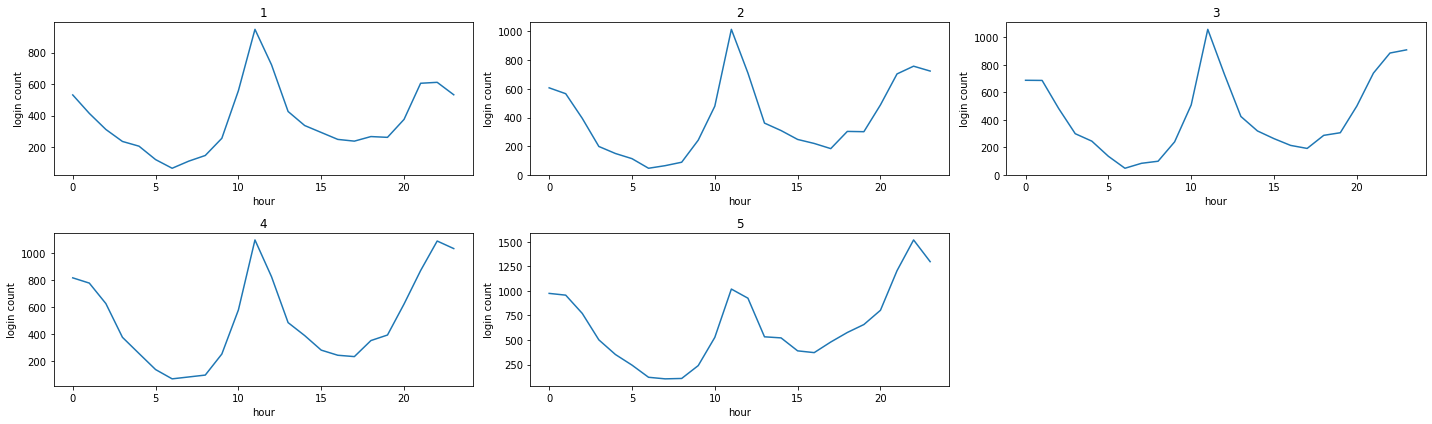

In [41]:
weekend = [6,7]
plt.figure(figsize=(20,6))
for i, day in enumerate(df1_h_w.weekOfday.unique(),1):
    if day not in weekend:
        #print(day)
        plt.subplot(2,3,i)
        plt.plot(df1_h_w.loc[df1_h_w['weekOfday']==day].hourOfday, df1_h_w.loc[df1_h_w['weekOfday']==day]['count'])
        plt.xlabel('hour')
        plt.ylabel('login count')
        plt.title(day)
plt.tight_layout()

compare it with weekend trend:

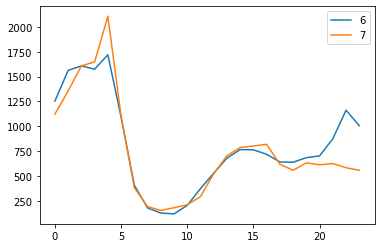

In [42]:
plt.plot(df1_h_w.loc[df1_h_w['weekOfday'] == 6].hourOfday, df1_h_w.loc[df1_h_w['weekOfday'] == 6]['count'] )
plt.plot(df1_h_w.loc[df1_h_w['weekOfday'] == 7].hourOfday, df1_h_w.loc[df1_h_w['weekOfday'] == 7]['count'] )
plt.legend([6,7])
plt.show()

**Part1 summary:**

- When look at daily trend, the plot suggests some cyclic behavior with a period of about 6~7 days. Demands hit peak around weekend and decline during weekdays.
- When look at weekly cycle, login increase from Thursday and hits maximum on Saturday.
- Druing weekday, demands have 2 peaks, first one is around 11am and second one is around 10pm.
- During weekend, demands have 1 peak around 3 ~ 4 am

**Part 2 ‑ Experiment and metrics design**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Answer : In order to explain my experiment clearly let me do a simulation first**

Simulate login data with driver id for city Gotham

In [43]:
dftest= pd.read_json('logins.json')
pd.set_option('display.max_rows', None)

In [44]:
dftest.shape

(93142, 1)

In [45]:
# assume there's 1000 driver in city Gotham
dftest = dftest.assign(driverid=np.random.choice(np.arange(0,1000), 93142, replace=True))
#dftest = dftest.assign(count=1)

In [46]:
dftest.head()

,login_time,driverid
0,1970-01-01 20:13:18,106
1,1970-01-01 20:16:10,63
2,1970-01-01 20:16:37,851
3,1970-01-01 20:16:36,375
4,1970-01-01 20:26:21,484


In [47]:
dftest= dftest.set_index('login_time')

In [48]:
dftest.shape

(93142, 1)

In [49]:
dftest.head()

,driverid
login_time,
1970-01-01 20:13:18,106
1970-01-01 20:16:10,63
1970-01-01 20:16:37,851
1970-01-01 20:16:36,375
1970-01-01 20:26:21,484


In [50]:
# get all unique driverid in city Gotham by month
dftest = dftest.resample('M')['driverid'].unique().reset_index()

In [51]:
dftest.head()

,login_time,driverid
0,1970-01-31,"[954, 106, 63, 375, 851, 250, 744, 484, 207, 8..."
1,1970-02-28,"[430, 346, 497, 831, 529, 549, 940, 796, 781, ..."
2,1970-03-31,"[797, 408, 499, 849, 103, 508, 166, 562, 622, ..."
3,1970-04-30,"[538, 756, 277, 603, 739, 942, 981, 938, 594, ..."


In [52]:
dftest = dftest.set_index('login_time')

In [53]:
dftest.head()

,driverid
login_time,
1970-01-31,"[954, 106, 63, 375, 851, 250, 744, 484, 207, 8..."
1970-02-28,"[430, 346, 497, 831, 529, 549, 940, 796, 781, ..."
1970-03-31,"[797, 408, 499, 849, 103, 508, 166, 562, 622, ..."
1970-04-30,"[538, 756, 277, 603, 739, 942, 981, 938, 594, ..."


In [54]:
# get unique driverid in January for city Gotham
driverid_Jan_cityG = dftest.loc['1970-01-31'].driverid

In [55]:
driverid_Jan_cityG

array([954, 106,  63, 375, 851, 250, 744, 484, 207, 890, 976,  99, 361,
        86, 689, 530, 354, 367, 959, 671, 854, 823, 868,  68, 312, 836,
       897, 658, 646, 563, 171, 742, 917, 168, 908, 122,  56, 666, 334,
       239, 924, 709, 555, 597, 411, 174, 643, 548, 946, 131,  65, 871,
       604, 679, 503, 794, 371, 700, 964, 264,  10, 502, 683, 659, 869,
       665,  83, 420,  25, 149,  43, 603, 397, 980, 967, 162, 872, 775,
       711, 482, 770, 641, 429,  20, 197, 985, 153, 155, 884, 806, 532,
       415,  17, 969, 252, 796, 489, 760,  30, 220, 639, 514, 611, 435,
       238, 905, 459, 886, 355, 947, 819, 528, 735, 537, 289, 972, 210,
       201, 158, 695, 332, 842,  92, 816, 930, 450, 973, 944, 837, 256,
       769, 126, 342, 480, 438, 109, 830,  33, 780, 627, 749, 310, 229,
       404,  88, 804, 616, 828, 761, 102, 161,  76, 327, 495, 860,  55,
        15, 580, 660, 801, 295, 364, 130, 498, 443, 194, 731, 163, 319,
       525, 427, 345, 235, 661, 212,  27, 800, 822,   1, 118, 74

**Simulate login data with driver id for city Metropolis:**

In [56]:
dftest2= pd.read_json('logins.json')

In [57]:
# assume there are also 1000 drivers in city Metropolis but only about 200 of them travel cross 2 cities
dftest2 = dftest2.assign(driverid=np.random.choice(np.arange(800,1800), 93142, replace=True))
#dftest = dftest.assign(count=1)

In [58]:
dftest2.head()

,login_time,driverid
0,1970-01-01 20:13:18,1416
1,1970-01-01 20:16:10,883
2,1970-01-01 20:16:37,938
3,1970-01-01 20:16:36,1589
4,1970-01-01 20:26:21,1036


In [59]:
dftest2= dftest2.set_index('login_time')

In [60]:
dftest2.shape

(93142, 1)

In [61]:
dftest2.head()

,driverid
login_time,
1970-01-01 20:13:18,1416
1970-01-01 20:16:10,883
1970-01-01 20:16:37,938
1970-01-01 20:16:36,1589
1970-01-01 20:26:21,1036


In [62]:
# get all unique driverid in city Metropolis by month
dftest2 = dftest2.resample('M')['driverid'].unique().reset_index()

In [63]:
dftest2.head()

,login_time,driverid
0,1970-01-31,"[1683, 1416, 883, 1589, 938, 1712, 1569, 1036,..."
1,1970-02-28,"[834, 922, 1018, 1752, 1736, 1356, 1390, 1514,..."
2,1970-03-31,"[1150, 1309, 1510, 975, 1527, 1330, 1280, 1262..."
3,1970-04-30,"[1246, 1370, 1140, 1148, 1727, 1110, 1625, 131..."


In [64]:
dftest2 = dftest2.set_index('login_time')

In [65]:
dftest2.head()

,driverid
login_time,
1970-01-31,"[1683, 1416, 883, 1589, 938, 1712, 1569, 1036,..."
1970-02-28,"[834, 922, 1018, 1752, 1736, 1356, 1390, 1514,..."
1970-03-31,"[1150, 1309, 1510, 975, 1527, 1330, 1280, 1262..."
1970-04-30,"[1246, 1370, 1140, 1148, 1727, 1110, 1625, 131..."


In [66]:
# get unique driverid in January for city Metropolis
driverid_Jan_cityM = dftest2.loc['1970-01-31'].driverid

In [67]:
driverid_Jan_cityM

array([1683, 1416,  883, 1589,  938, 1712, 1569, 1036, 1691,  821, 1253,
       1165, 1516, 1745,  851, 1319, 1260, 1106,  962, 1567, 1244, 1390,
       1274, 1790, 1631, 1542,  864,  820, 1262, 1492, 1015, 1048, 1425,
       1781, 1222, 1354,  872, 1071, 1523, 1265, 1234, 1338, 1664, 1529,
       1524, 1247, 1171, 1241, 1099, 1376,  816, 1642, 1024, 1312, 1563,
       1445,  937, 1184, 1782,  914, 1047, 1085,  952, 1304, 1322, 1283,
       1088,  910, 1386, 1197, 1400, 1791, 1788, 1441, 1289, 1276, 1501,
       1327, 1257, 1490, 1310, 1173, 1186, 1307, 1482, 1488, 1190, 1323,
       1669, 1598, 1551, 1676, 1094, 1528, 1300,  827, 1623, 1095, 1726,
       1328,  987, 1578, 1226, 1550,  880, 1237, 1393, 1539, 1799, 1145,
       1645, 1420, 1277, 1637, 1545, 1379, 1792, 1014,  871,  832, 1072,
       1418, 1675, 1221, 1365,  920, 1678, 1161, 1568, 1595,  848,  989,
        886, 1125, 1504,  963, 1614, 1560,  870, 1271, 1334, 1592,  899,
       1155, 1079, 1443, 1795,  974, 1689,  973, 10

In [68]:
# count the number of the drivers that drive cross 2 cities 
crossbridge_driver_Jan = len(np.intersect1d(driverid_Jan_cityM, driverid_Jan_cityG))
crossbridge_driver_Jan
print('Number of drivers who drive cross 2 cities in Jan is: ', crossbridge_driver_Jan)

Number of drivers who drive cross 2 cities in Jan is:  200


**Process:**

1.Track driverid together with login_time in city Gotham and Metropolis

2.Key metrics: crossbridge_driver/Month

3.Following the process above we can:

1)Start the experiment for 3 months and average the montly crossbridge_driver (sample mean)
2)Average number of monthly crossbridge_driver 1 year prior to the experiment (population mean)
3)Compare mean_before and mean_after, use t-test to prove that the mean_after has increased

4.Hypothesis:

H0: The monthly average crossbridge_driver did not change after the experiment. (no difference between mean_before and mean_after)

HA: The monthly average crossbridge_driver increased after the experiment.(mean_before<mean_after)

5.we will use α level of 0.05.

It is a one-tail alternative hypothesis

We will use t-test to test the null hypothesis

We will calculate the test statistic

We will calculate the p-value associated with our test statistic

**Simulate experiment result:**

In [69]:
from scipy.stats import t

In [70]:
# simulate crossbridge_driver number in each month for the past 12 months before starting the experiment
before = np.random.choice(np.arange(100, 300), 12)


# simulate crossbridge_driver number in each month for 3 months after starting the experiment, assume the number increased than before
after = np.random.choice(np.arange(300, 500), 3)

In [71]:
print(before)
print(after)

[183 108 141 265 141 138 119 157 205 295 299 149]
[492 444 303]


In [72]:
# simulate population mean_before by resampling 3 samples with replacement from 'before' and calculate the mean for 10000 times
sample_mean_list = [np.mean(np.random.choice(before, 3, replace=True)) for i in range(10000)]

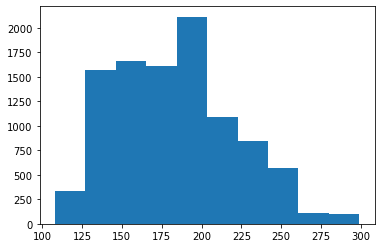

In [73]:
plt.hist(sample_mean_list)
plt.show()

In [74]:
mean_before = np.mean(sample_mean_list)
mean_before = round(mean_before)
mean_before

183

In [75]:
mean_after = round(np.mean(after))
mean_after

413

In [76]:
t_score = (mean_before-mean_after)/(np.std(after)/np.sqrt(len(after)))
t_score

-4.966471356710121

In [77]:
pval = t.sf(np.abs(t_score), df=3-1)
print(pval)

0.01911600448681436


As Pval < 0.05, therefore we can reject null hypothesis and say the experiment did succeed

**Part 3 ‑ Predictive modeling**

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

**Data description**

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [78]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [79]:
df2.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [80]:
df2.shape

(50000, 12)

**1 Data Cleaning**

In [81]:
pd.DataFrame((df2.isnull().sum(),df2.dtypes), index=['missing value', 'data type']).T

,missing value,data type
city,0,object
trips_in_first_30_days,0,int64
signup_date,0,object
avg_rating_of_driver,8122,float64
avg_surge,0,float64
last_trip_date,0,object
phone,396,object
surge_pct,0,float64
ultimate_black_user,0,bool
weekday_pct,0,float64


In [82]:
# fill categorical variable that has missing value with 'None' as Model CatBoost can not have NaN value in categorical variables
df2.phone.fillna('None', inplace=True)

In [83]:
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [84]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [85]:
# df2[['signup_date', 'last_trip_date' ]] = pd.to_datetime(df2[['signup_date', 'last_trip_date' ]],format='%Y-%m-%d')
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

In [86]:
print('latest date of signup: {}'.format(df2['signup_date'].max()))
print('latest date of lastrtip: {}'.format(df2['last_trip_date'].max()))

latest date of signup: 2014-01-31 00:00:00
latest date of lastrtip: 2014-07-01 00:00:00


We assume the day they pulled the data was 2014-07-01 Therefore the retained user is the one who took a trip in the preceding 30 days which means last_trip_date should be in June or July.
Also this is what we define 'acitve user in their 6th month' as they all signed up in Jan 2014

In [87]:
df2['active_6month'] = np.where((df2.last_trip_date.map(lambda x: x.month)>=6),1,0)
retained_pct = df2.active_6month.value_counts(normalize=True)
retained_pct

0    0.62392
1    0.37608
Name: active_6month, dtype: float64

In [88]:
print('The fraction of retained users is:{:.2%}'.format(retained_pct[1]))

The fraction of retained users is:37.61%


In [89]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_6month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [90]:
df2.shape

(50000, 13)

**2 EDA**

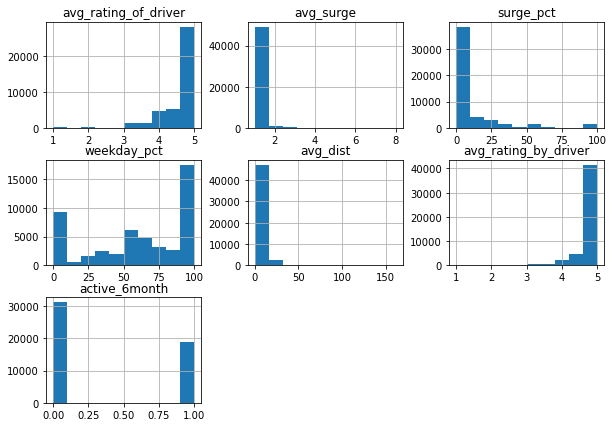

In [91]:
df2.select_dtypes(include=['float', 'int']).hist(figsize=(10,7))
plt.show()

In [92]:
pd.DataFrame((df2.isnull().sum(),df2.dtypes), index=['missing value', 'data type']).T

,missing value,data type
city,0,object
trips_in_first_30_days,0,int64
signup_date,0,datetime64[ns]
avg_rating_of_driver,8122,float64
avg_surge,0,float64
last_trip_date,0,datetime64[ns]
phone,0,object
surge_pct,0,float64
ultimate_black_user,0,bool
weekday_pct,0,float64


In [93]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_6month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [94]:
#df2_features= df2.drop(['avg_surge', 'signup_date','last_trip_date'], axis=1)

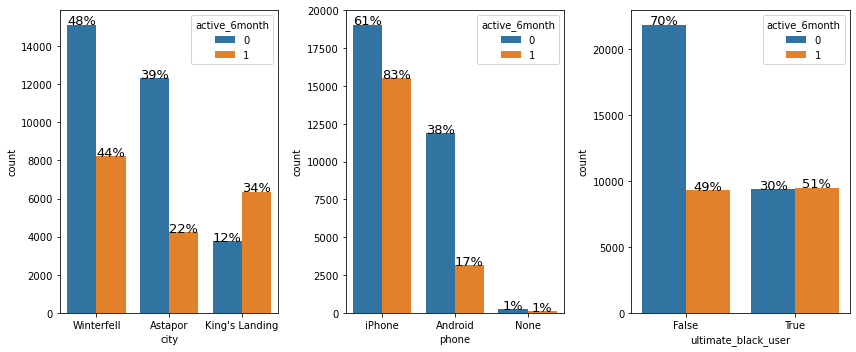

In [95]:
plt.figure(figsize=(12,5))
for i, col in enumerate(['city', 'phone', 'ultimate_black_user'],1):
    plt.subplot(1,3,i)
    ax = sns.countplot(col, data=df2, hue='active_6month', order=df2[col].value_counts().index)
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total_left = df2[df2.active_6month==0].shape[0]
        total_right = df2[df2.active_6month==1].shape[0]

        ax.text(left.get_x() + left.get_width()/2., height_l + 3, '{0:.0%}'.format(height_l/total_left), ha="center",fontsize=13)
        ax.text(right.get_x() + right.get_width()/2., height_r + 3, '{0:.0%}'.format(height_r/total_right), ha="center",fontsize=13)

plt.tight_layout()

In [96]:
list_numerical = df2.select_dtypes(include=['float', 'int']).columns.tolist()
list_numerical

['avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'active_6month']

In [97]:
# plt.figure(figsize=(12,5))
# #fig, axs = plt.subplots(2,4)
# for index, col in enumerate(list_float,1):
#     plt.subplot(2,4,index)
#     if col != 'active_6month':
#         sns.boxplot(data=df2[list_float], x='active_6month', y=col)
# plt.tight_layout()


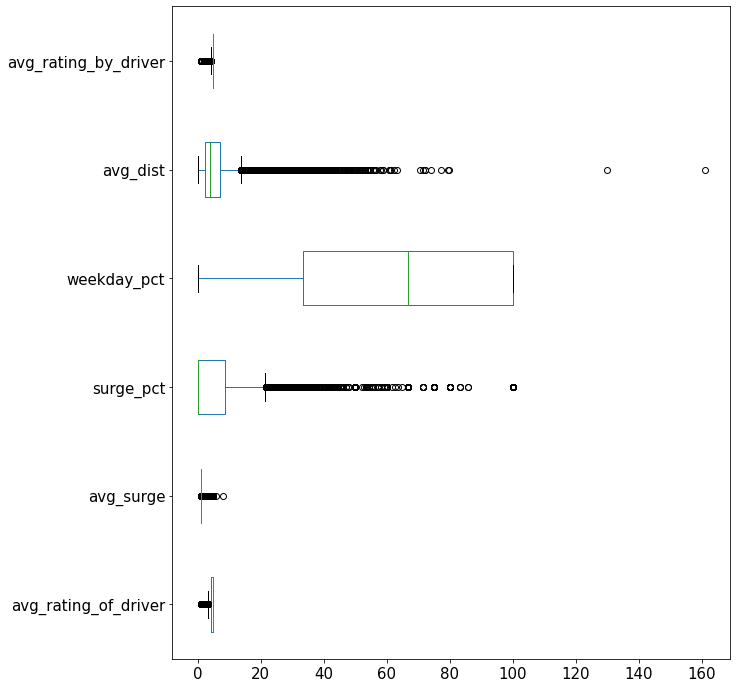

In [98]:
# check outliers
df2[list_numerical].drop('active_6month',axis=1).boxplot(grid=False, vert=False,fontsize=15,figsize=(10,12))
plt.show()


**3 Experiment_1: Drop outliers**

In [99]:
Q1 = df2[list_numerical].quantile(0.25)
Q3 = df2[list_numerical].quantile(0.75)

IQR = Q3 - Q1

# drop outliers
df2[list_numerical]= df2[list_numerical][~((df2[list_numerical]<(Q1 - 1.5*IQR))| (df2[list_numerical]>(Q3 + 1.5*IQR))).any(axis=1)]

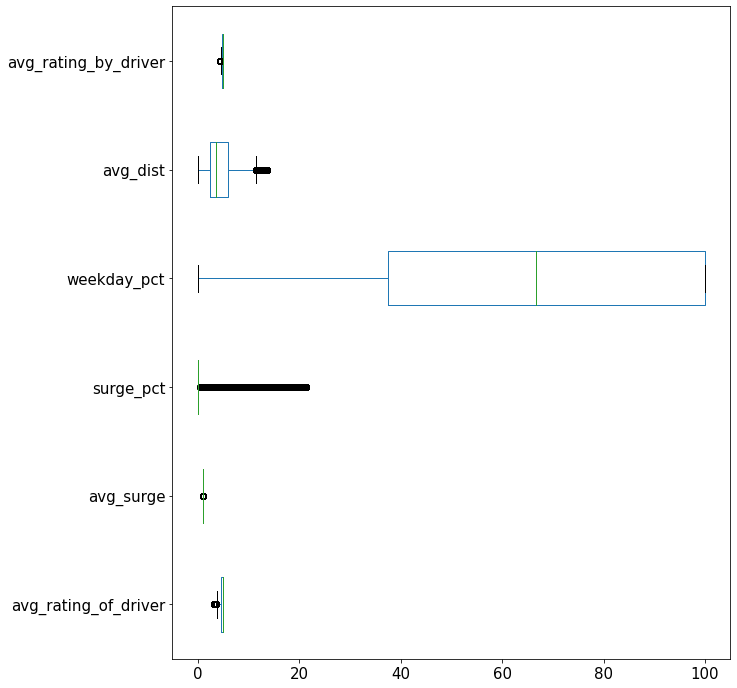

In [100]:
df2[list_numerical].drop('active_6month',axis=1).boxplot(grid=False, vert=False,fontsize=15,figsize=(10,12))
plt.show()

In [101]:
df2.shape

(50000, 13)

In [102]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.000,3.00,125.00
avg_rating_of_driver,27378.0,4.695336,0.416579,3.3,4.50,5.000,5.00,5.00
avg_surge,32484.0,1.010765,0.026028,1.0,1.00,1.000,1.00,1.12
surge_pct,32484.0,1.877377,4.436999,0.0,0.00,0.000,0.00,21.40
weekday_pct,32484.0,62.256646,36.323304,0.0,37.50,66.700,100.00,100.00
avg_dist,32484.0,4.558947,2.996647,0.0,2.36,3.695,6.01,13.72
avg_rating_by_driver,32344.0,4.875634,0.189107,4.3,4.80,5.000,5.00,5.00
active_6month,32484.0,0.391547,0.488104,0.0,0.00,0.000,1.00,1.00


In [103]:
df2.isnull().sum()

city                          0
trips_in_first_30_days        0
signup_date                   0
avg_rating_of_driver      22622
avg_surge                 17516
last_trip_date                0
phone                         0
surge_pct                 17516
ultimate_black_user           0
weekday_pct               17516
avg_dist                  17516
avg_rating_by_driver      17656
active_6month             17516
dtype: int64

In [104]:
df2.dropna(subset=['active_6month'],inplace=True)

In [105]:
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      5106
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       140
active_6month                0
dtype: int64

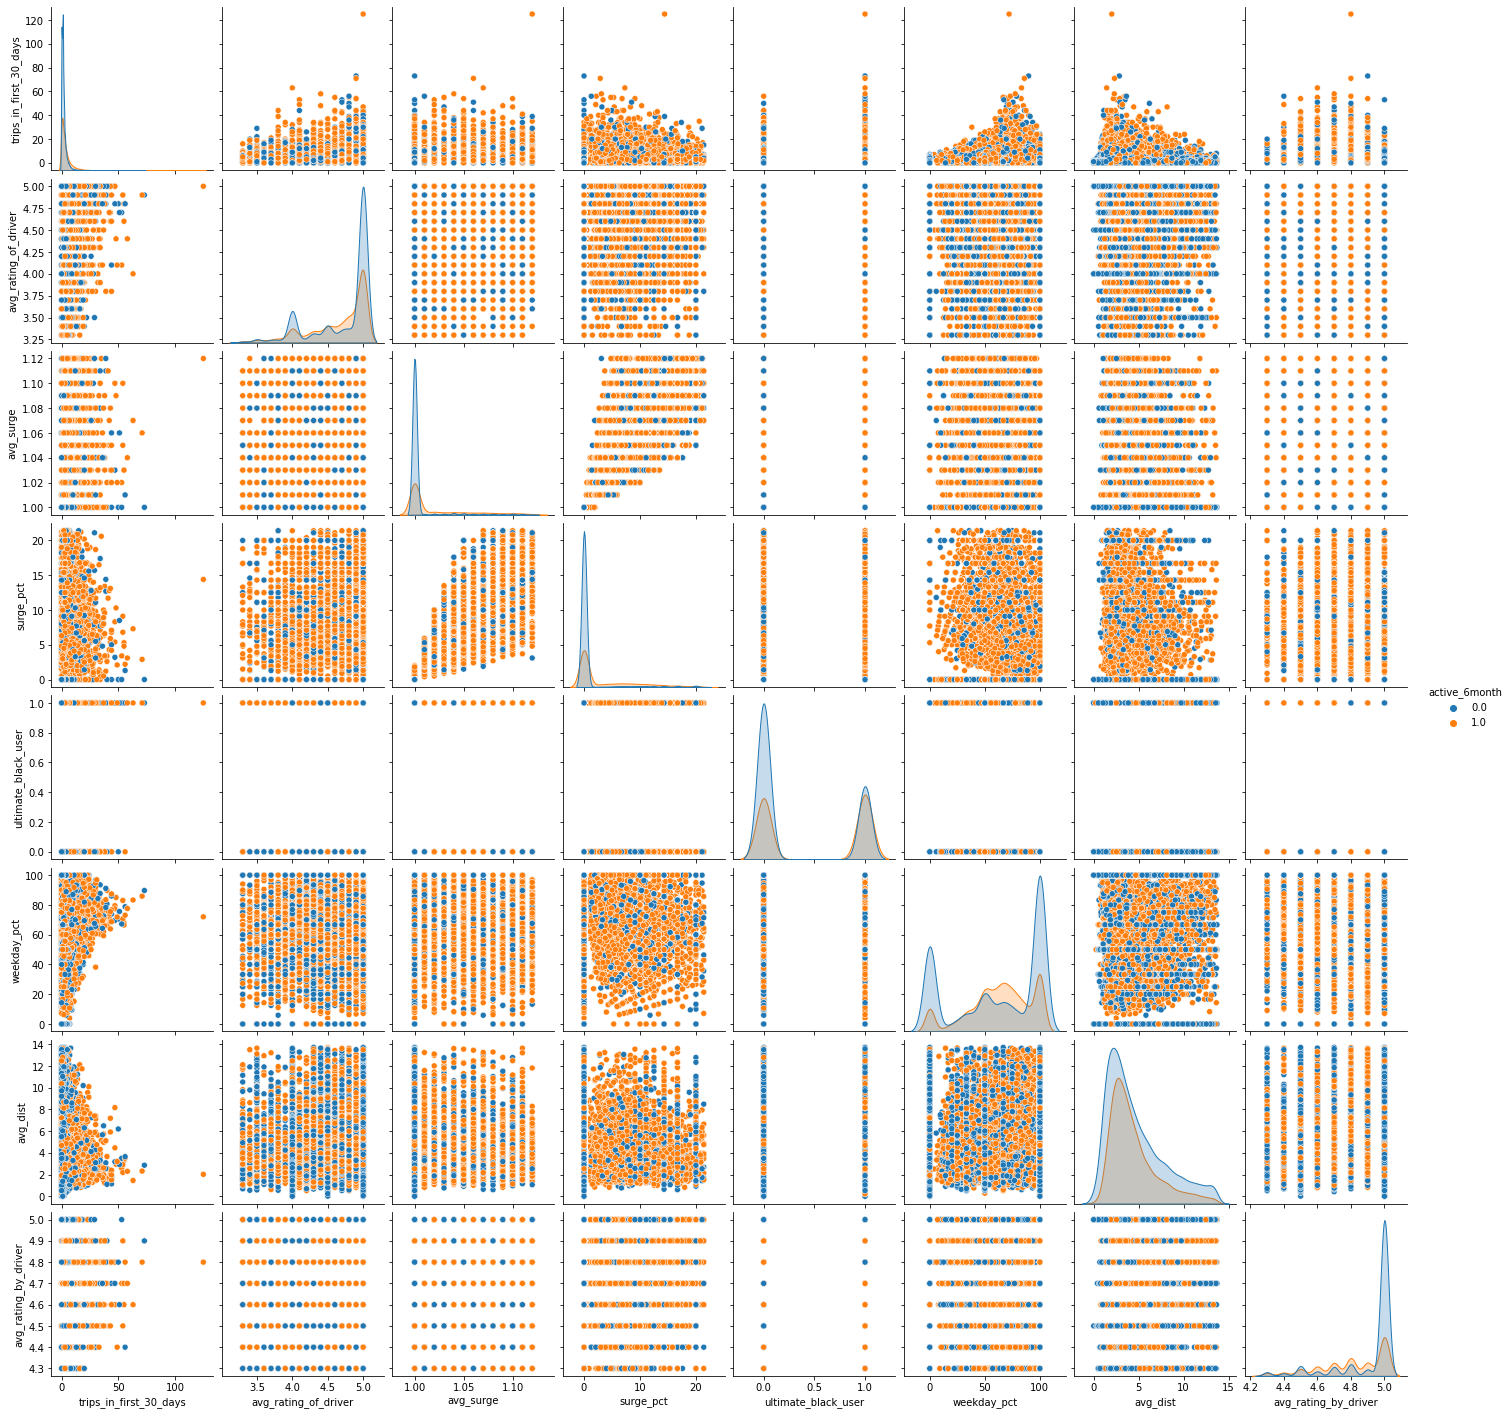

In [106]:
sns.pairplot(data=df2, hue='active_6month')
plt.show()

In [107]:
df2.shape

(32484, 13)

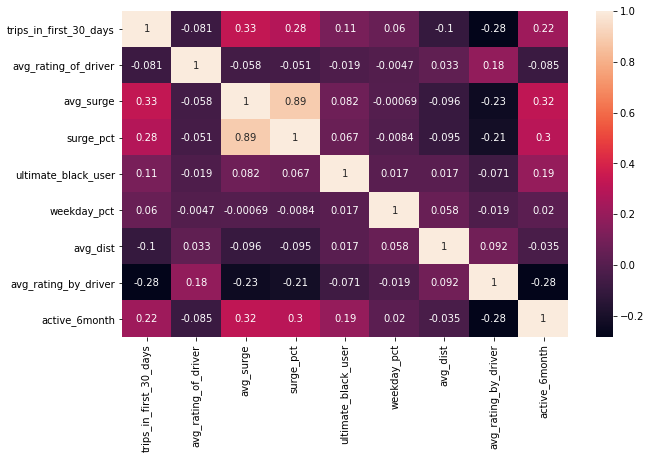

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [109]:
X = df2.drop(['active_6month', 'avg_surge', 'signup_date','last_trip_date'], axis=1)
y = df2.active_6month

In [110]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_feature_indices= []

for i, j in enumerate(X.columns):
    if j in cat_features:
        cat_feature_indices.append(i)

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)

In [112]:
y_test.sum()/len(y_test)

0.39154524933305973

In [113]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([5930, 3816], dtype=int64))

**3.1 Model Catboost**

In [114]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [115]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score, accuracy_score,roc_curve,auc
import time

In [116]:
# final_model = trainmodel_cv(CatBoostClassifier(),)
start_time=time.time()
final_model = CatBoostClassifier()
final_model.fit(X_train, y_train, cat_features = cat_feature_indices, silent=True)

y_pred = final_model.predict(X_test)
ypred_proba = final_model.predict_proba(X_test)[:,1]
end_time=time.time()

precision, recall, f1score, support = score(y_test, y_pred, pos_label=1,average='binary')
roc_auc = roc_auc_score(y_test, ypred_proba)

accuracy = round(accuracy_score(y_test,y_pred),3)
time_cat = end_time - start_time

In [117]:
round(pd.DataFrame([precision, recall, f1score, roc_auc, accuracy, time_cat],
                       index=['precison','recall','f1score','roc_auc', 'accuracy', 'time_cat']),2).T

,precison,recall,f1score,roc_auc,accuracy,time_cat
0,0.77,0.68,0.72,0.86,0.8,19.53


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,  y_pred, labels=[1,0])

array([[2608, 1208],
       [ 794, 5136]], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

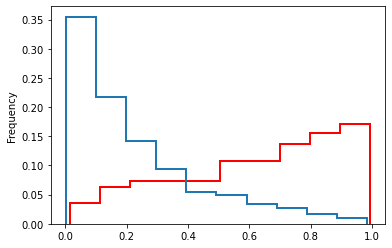

In [119]:
predProba_label = pd.DataFrame()
predProba_label['proba'] = ypred_proba
predProba_label['label'] = y_test

weights_1 = np.ones_like(predProba_label[predProba_label['label']==1].proba.index)/len(predProba_label[predProba_label['label']==1].proba.index)
predProba_label[predProba_label['label']==1].proba.plot(kind='hist',
                                                                      bins=10,
                                                                      color='r',
                                                                      label='Target',
                                                                      histtype='step',
                                                                      stacked=False,
                                                                      lw=2,
                                                                      weights=weights_1,
                                                                      )


weights_2 = np.ones_like(predProba_label[predProba_label['label']==0].proba.index)/len(predProba_label[predProba_label['label']==0].proba.index)
predProba_label[predProba_label['label']==0].proba.plot(kind='hist',
                                                                     bins=10,
                                                                     label='non-Target',
                                                                     histtype='step',
                                                                     stacked=False,
                                                                     lw=2,
                                                                     weights=weights_2,
                                                                     )

In [120]:
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
feature_names = X.columns
#final_model = trainmodel_cv(CatBoostClassifier(iterations=939,  depth=4, learning_rate=0.014877, silent=True), 5)
feature_importances  = final_model.get_feature_importance(train_pool)

feature_df = pd.DataFrame(sorted(zip(feature_importances, feature_names), reverse=True), columns=['Feature Importance', 'Variable'])

In [121]:
feature_df

,Feature Importance,Variable
0,19.332632,weekday_pct
1,14.536073,avg_rating_by_driver
2,14.118282,city
3,12.617061,trips_in_first_30_days
4,11.649584,surge_pct
5,9.369508,avg_dist
6,7.267711,phone
7,5.811893,avg_rating_of_driver
8,5.297256,ultimate_black_user


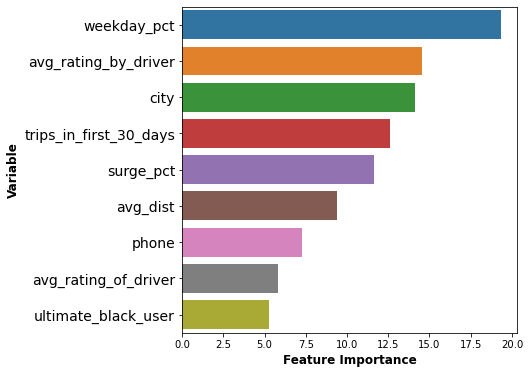

In [122]:
plt.figure(figsize=(6,6))
g = sns.barplot('Feature Importance', 'Variable', data=feature_df)
g.set_xlabel('Feature Importance',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()

**3.2 Model Lightgbm**

In [123]:
import lightgbm as lgb
from sklearn.metrics import classification_report

In [124]:
X.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [125]:
X[['city', 'phone']] = X[['city', 'phone']].astype('category')

In [126]:
X.city.value_counts()

Winterfell        15142
Astapor           10789
King's Landing     6553
Name: city, dtype: int64

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=43)

In [128]:
start_time = time.time()
model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='Recall')
model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=10)

expected_y  = y_test
y_pred = model.predict(X_test)
end_time = time.time()
time_lgbm = end_time - start_time

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: custom_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[10]	valid_0's binary_logloss: 0.509661
[20]	valid_0's binary_logloss: 0.472605
[30]	valid_0's binary_logloss: 0.460337
[40]	valid_0's binary_logloss: 0.455653
[50]	valid_0's binary_logloss: 0.453341
[60]	valid_0's binary_logloss: 0.451496
[70]	valid_0's binary_logloss: 0.450638
[80]	valid_0's binary_logloss: 0.449937
[90]	valid_0's binary_logloss: 0.449579
[100]	valid_0's binary_logloss: 0.44938


In [129]:
print(classification_report(expected_y, y_pred))
print(confusion_matrix(expected_y, y_pred, labels=[1,0]))
print(time_lgbm)

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      5930
         1.0       0.76      0.69      0.72      3816

    accuracy                           0.79      9746
   macro avg       0.78      0.77      0.78      9746
weighted avg       0.79      0.79      0.79      9746

[[2626 1190]
 [ 836 5094]]
0.1286618709564209


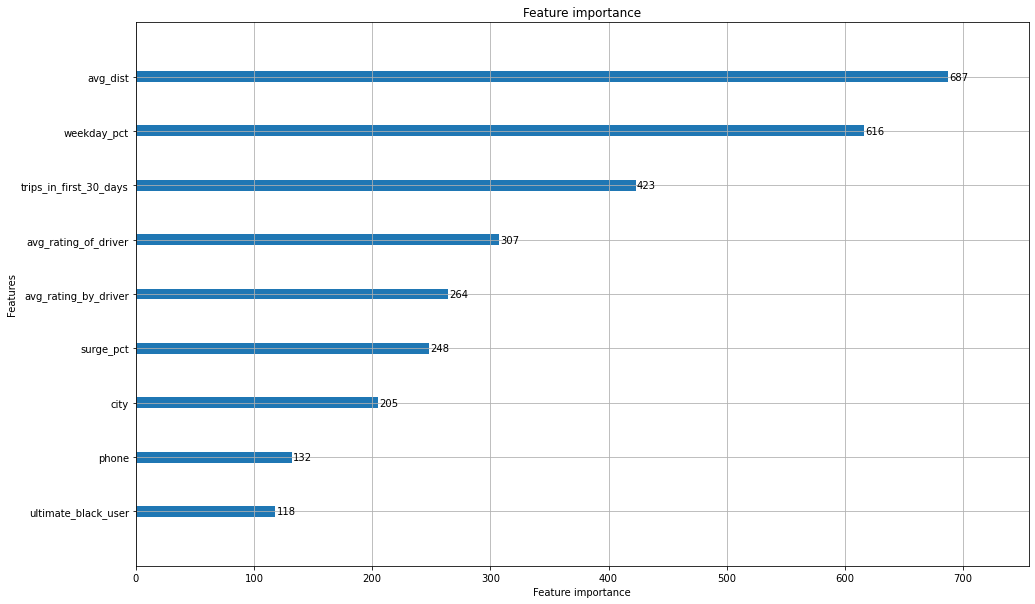

In [130]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()

**4 Experiment_2: Do not drop outliers**

In [131]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [132]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

df2['active_6month'] = np.where((df2.last_trip_date.map(lambda x: x.month)>=6),1,0)

In [133]:
df2.phone.fillna('None', inplace=True)

In [134]:
X = df2.drop(['active_6month', 'avg_surge', 'signup_date','last_trip_date'], axis=1)
y = df2.active_6month

In [135]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_feature_indices= []

for i, j in enumerate(X.columns):
    if j in cat_features:
        cat_feature_indices.append(i)

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)

In [137]:
y_test.sum()/len(y_test)

0.37606666666666666

In [138]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([9359, 5641], dtype=int64))

**4.1 Model Catboost**

In [139]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [140]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [141]:
# final_model = trainmodel_cv(CatBoostClassifier(),)

start_time=time.time()
final_model = CatBoostClassifier()
final_model.fit(X_train, y_train, cat_features = cat_feature_indices, silent=True)

y_pred = final_model.predict(X_test)
ypred_proba = final_model.predict_proba(X_test)[:,1]
end_time=time.time()

precision, recall, f1score, support = score(y_test, y_pred, pos_label=1,average='binary')
roc_auc = roc_auc_score(y_test, ypred_proba)

accuracy = round(accuracy_score(y_test,y_pred),3)
time_cat = end_time - start_time

In [142]:
round(pd.DataFrame([precision, recall, f1score, roc_auc, accuracy, time_cat],
                       index=['precison','recall','f1score','roc_auc', 'accuracy', 'time_cat']),2).T

,precison,recall,f1score,roc_auc,accuracy,time_cat
0,0.76,0.67,0.71,0.86,0.8,27.15


In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,  y_pred, labels=[1,0])

array([[3766, 1875],
       [1184, 8175]], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

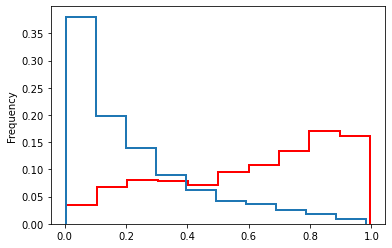

In [144]:
predProba_label = pd.DataFrame()
predProba_label['proba'] = ypred_proba
predProba_label['label'] = y_test

weights_1 = np.ones_like(predProba_label[predProba_label['label']==1].proba.index)/len(predProba_label[predProba_label['label']==1].proba.index)
predProba_label[predProba_label['label']==1].proba.plot(kind='hist',
                                                                      bins=10,
                                                                      color='r',
                                                                      label='Target',
                                                                      histtype='step',
                                                                      stacked=False,
                                                                      lw=2,
                                                                      weights=weights_1,
                                                                      )


weights_2 = np.ones_like(predProba_label[predProba_label['label']==0].proba.index)/len(predProba_label[predProba_label['label']==0].proba.index)
predProba_label[predProba_label['label']==0].proba.plot(kind='hist',
                                                                     bins=10,
                                                                     label='non-Target',
                                                                     histtype='step',
                                                                     stacked=False,
                                                                     lw=2,
                                                                     weights=weights_2,
                                                                     )

In [145]:
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
feature_names = X.columns
#final_model = trainmodel_cv(CatBoostClassifier(iterations=939,  depth=4, learning_rate=0.014877, silent=True), 5)
feature_importances  = final_model.get_feature_importance(train_pool)

feature_df = pd.DataFrame(sorted(zip(feature_importances, feature_names), reverse=True), columns=['Feature Importance', 'Variable'])

In [146]:
feature_df

,Feature Importance,Variable
0,20.553781,weekday_pct
1,14.532257,avg_rating_by_driver
2,14.110139,city
3,12.341471,surge_pct
4,12.208013,trips_in_first_30_days
5,8.537686,avg_dist
6,7.130082,phone
7,5.609642,avg_rating_of_driver
8,4.976930,ultimate_black_user


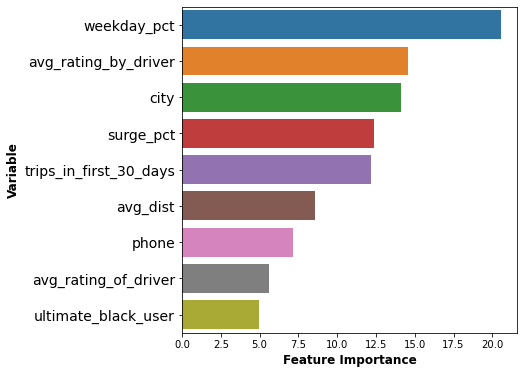

In [147]:
plt.figure(figsize=(6,6))
g = sns.barplot('Feature Importance', 'Variable', data=feature_df)
g.set_xlabel('Feature Importance',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()

**4.2 Model Lightgbm**

In [148]:
import lightgbm as lgb
from sklearn.metrics import classification_report

In [149]:
X.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [150]:
X[['city', 'phone']] = X[['city', 'phone']].astype('category')

In [151]:
X.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=43)

In [153]:
start_time = time.time()
model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='Recall')
model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=10)

expected_y  = y_test
y_pred = model.predict(X_test)
end_time = time.time()
time_lgbm = end_time - start_time

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: custom_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[10]	valid_0's binary_logloss: 0.512569
[20]	valid_0's binary_logloss: 0.473041
[30]	valid_0's binary_logloss: 0.460955
[40]	valid_0's binary_logloss: 0.455469
[50]	valid_0's binary_logloss: 0.452757
[60]	valid_0's binary_logloss: 0.45147
[70]	valid_0's binary_logloss: 0.450386
[80]	valid_0's binary_logloss: 0.449565
[90]	valid_0's binary_logloss: 0.44905
[100]	valid_0's binary_logloss: 0.448715


In [154]:
print(classification_report(expected_y, y_pred))
print(confusion_matrix(expected_y, y_pred, labels=[1,0]))
print('fit and predict time: {}'.format(time_lgbm))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      9359
           1       0.76      0.67      0.71      5641

    accuracy                           0.79     15000
   macro avg       0.78      0.77      0.77     15000
weighted avg       0.79      0.79      0.79     15000

[[3768 1873]
 [1221 8138]]
fit and predict time: 0.21250224113464355


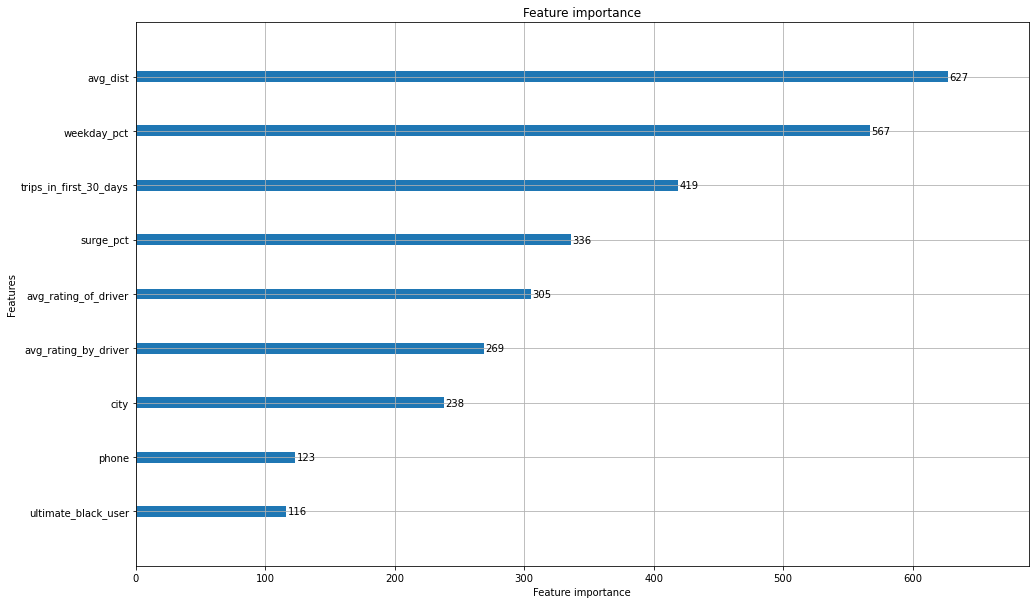

In [155]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()

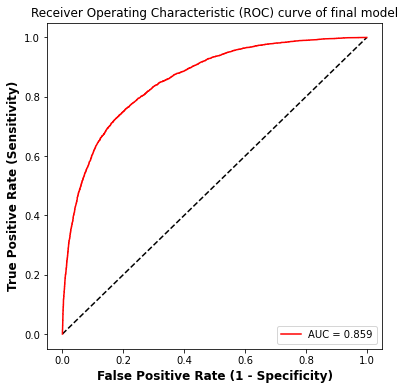

In [156]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]


lr_fpr,lr_tpr,threshold = roc_curve(y_test,y_pred_proba)
roc_auc_ = auc(lr_fpr,lr_tpr)
plt.figure(figsize=(6,6))
_=plt.plot([0,1],[0,1],'k--')
_=plt.plot(lr_fpr,lr_tpr,'r',label='AUC = %.3f'%roc_auc_)
_=plt.title('Receiver Operating Characteristic (ROC) curve of final model')
_=plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=12,fontweight='bold')
_=plt.ylabel('True Positive Rate (Sensitivity)',fontsize=12,fontweight='bold')
_=plt.legend(loc='lower right')

**5 Conclusion:**

1.As our dataset contains missing values and has mixed type of data types (int, float, object), therefore we chose model CatBoost and lightgbm classifier in this case.

2.We first dropped the outliers in the numerical variables and trained 2 models, this changed the dataset shape from (50000, 13) to (30112,13).

We scored precision, recall, roc_auc, accuracy, and time(fit and predict) for 2 models. Then we trained 2 models with outliers and scored the same metrics, and we observed that recall slightly increased from 0.66 to 0.67 if we do not drop outliers.

3.Regardless of training models with or without outliers, CatBoost and Lightgbm both gave us very similar results in terms of precison, recall, accuracy. However Lightgbm took less time to fit data and predict results.

Lightgbm: 0.212s CatBoost: 27.15s
        
Therefore we choose Lightgbm as our final model

4.According to our final model Lightgbm, factors that are best predictors for retention are avg_dist, weekday_pct, trips_in_first_30_days, surge_pct. (Top 4 features)

5.By analyzing scatter plot we realized that users with lower surge_pct who travel frequently on weekday are very likely to be the retained user. Users who travles 2~6 miles per trip in their first 30 days after signup with lower surge_pct (lower than 6) are likely to be retained users